In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.columns.size

9

In [4]:
X = df.iloc[: , :8]
y = df.iloc[: , -1]

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 2 , test_size = 0.2)

C:\Users\arups\AppData\Local\Temp\ipykernel_8628\3660561734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


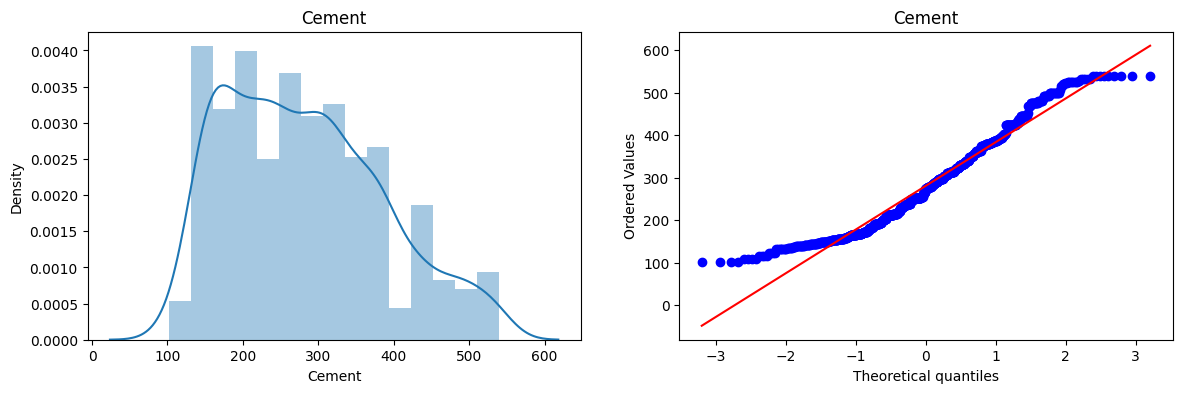

C:\Users\arups\AppData\Local\Temp\ipykernel_8628\3660561734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


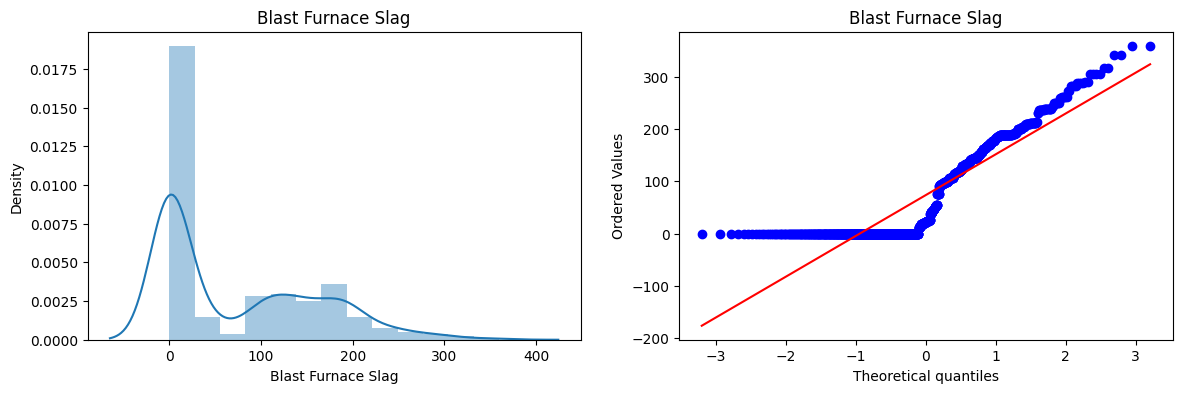

C:\Users\arups\AppData\Local\Temp\ipykernel_8628\3660561734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


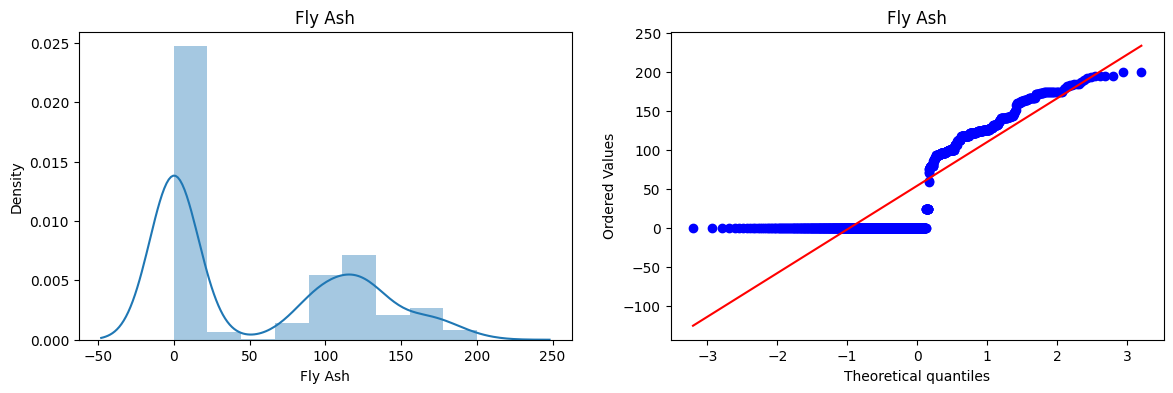

C:\Users\arups\AppData\Local\Temp\ipykernel_8628\3660561734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


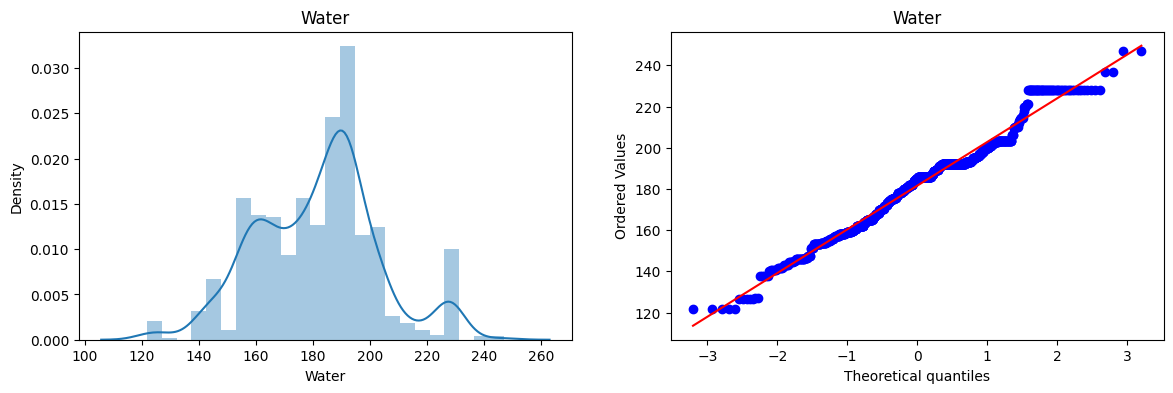

C:\Users\arups\AppData\Local\Temp\ipykernel_8628\3660561734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


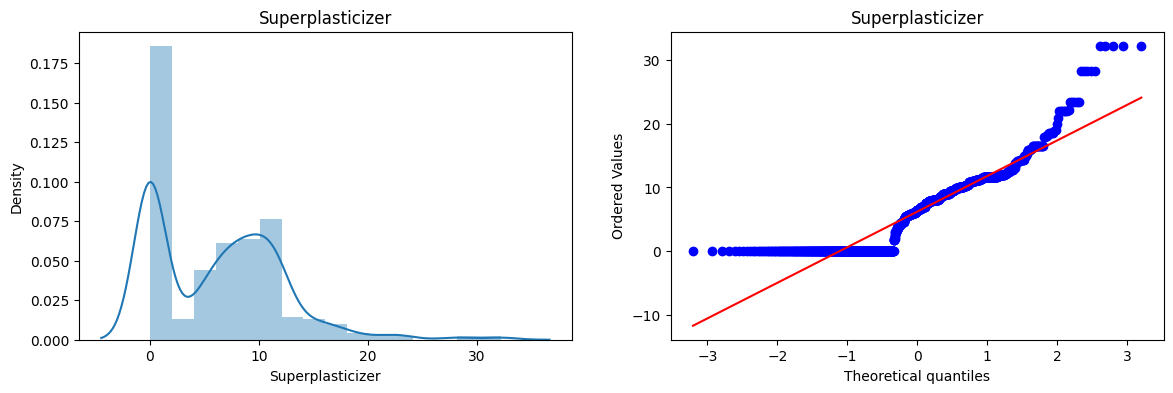

C:\Users\arups\AppData\Local\Temp\ipykernel_8628\3660561734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


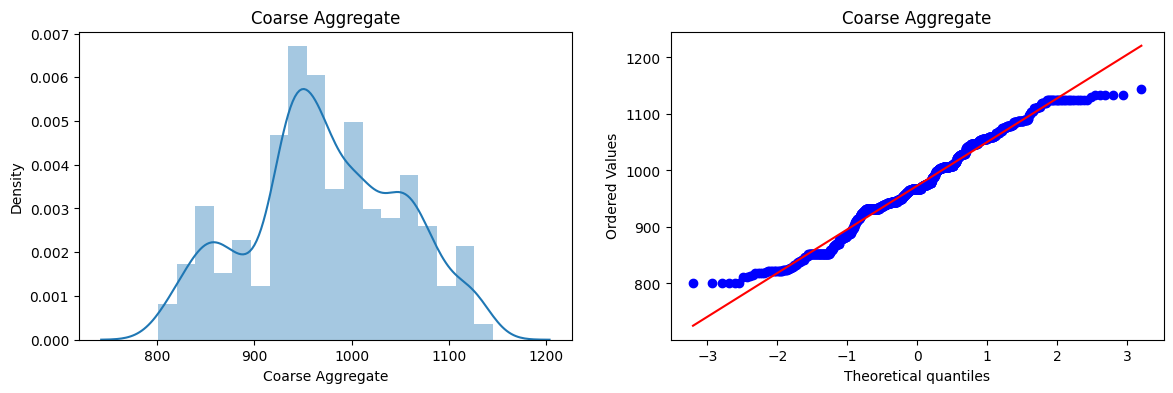

C:\Users\arups\AppData\Local\Temp\ipykernel_8628\3660561734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


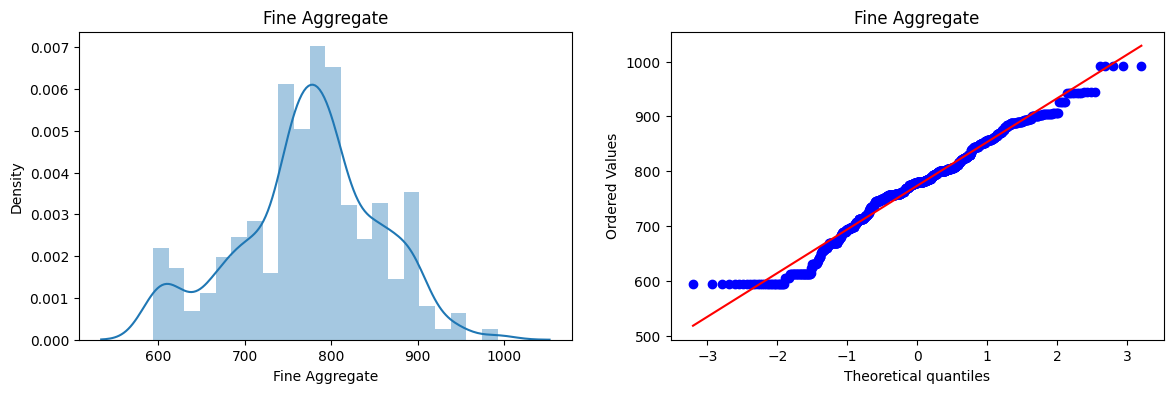

C:\Users\arups\AppData\Local\Temp\ipykernel_8628\3660561734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


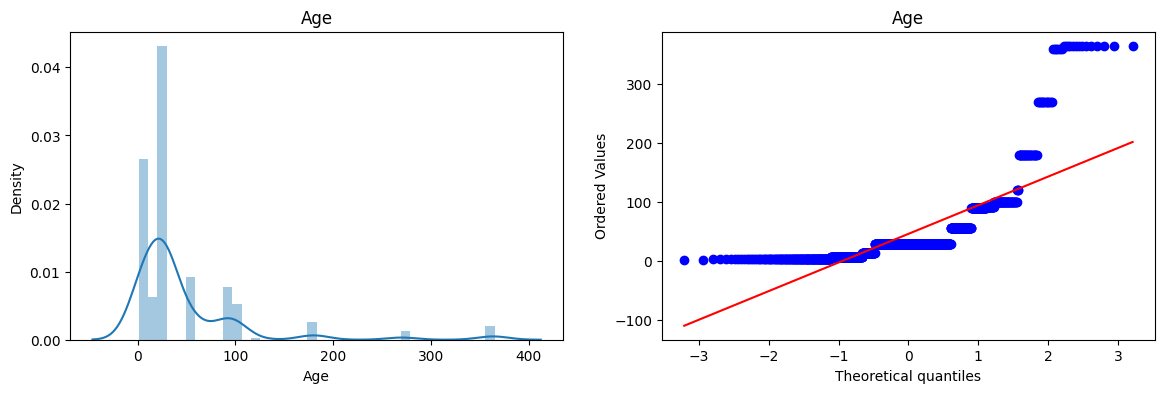

In [6]:
for col in X.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()
        

In [7]:
np.round(X_train.describe() , 1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,824.0,824.0,824.0,824.0,824.0,824.0,824.0,824.0
mean,283.6,72.9,53.4,181.7,6.2,974.0,772.0,46.9
std,105.8,86.8,63.7,21.6,6.0,77.9,80.6,66.3
min,102.0,0.0,0.0,121.8,0.0,801.0,594.0,1.0
25%,194.7,0.0,0.0,164.9,0.0,932.0,726.8,7.0
50%,275.6,20.0,0.0,185.0,6.4,968.0,778.9,28.0
75%,356.8,141.6,118.2,192.0,10.3,1030.0,824.0,56.0
max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365.0


In [8]:
# Applying BOX-COX transform

pt = PowerTransformer(method = 'box-cox' , standardize=True)
X_train_transform = pt.fit_transform(X_train+0.000001) # 0.000001 because we have some 0 value in dataframe
X_test_transform = pt.fit_transform(X_test+0.000001)
pd.DataFrame({'cols' : X_train.columns , 'box-cox-lambdas':pt.lambdas_})

,cols,box-cox-lambdas
0,Cement,0.160239
1,Blast Furnace Slag,0.047626
2,Fly Ash,-0.013013
3,Water,1.093803
4,Superplasticizer,0.131116
5,Coarse Aggregate,1.667688
6,Fine Aggregate,1.168835
7,Age,0.154403


In [9]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transform , y_train)
y_pred = lr.predict(X_test_transform)
r2_score(y_test , y_pred)

0.7673231794456334

In [17]:
X_train_transform = pd.DataFrame(X_train_transform , columns=X_train.columns)

In [18]:
X_train_transform

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.107236,0.912859,-0.891612,-1.612665,0.831733,-0.349959,1.006947,0.121059
1,-0.564182,0.840572,1.125789,-1.215412,0.789001,0.517247,0.056254,-0.451366
2,1.404829,0.738763,1.092979,-0.909040,0.836095,-0.090518,-0.778195,-1.012675
3,0.391456,-1.067576,-0.891612,0.488650,-1.279698,-0.051981,0.977847,2.329725
4,1.266606,0.927731,-0.891612,-1.316632,0.925999,-1.565301,1.502435,1.120577
...,...,...,...,...,...,...,...,...
819,-0.525683,0.842449,1.126949,-1.936483,0.842513,1.306710,0.211332,-0.451366
820,-0.867545,-1.067576,1.127792,-0.690729,0.796603,1.349156,0.291711,1.202003
821,0.216443,-1.067576,1.107945,-0.619872,0.783813,-0.165018,1.187267,-1.684032
822,1.001584,0.715992,1.106193,-1.148125,0.836095,-0.462961,0.908849,-1.012675


In [12]:
# Using cross_val_score

lr = LinearRegression()
pr = PowerTransformer(method = 'box-cox') # Default is yeo-johnson and it is better because it handles the 0 
X_transform = pr.fit_transform(X + 0.00001)
print(np.mean(cross_val_score(lr , X_transform , y.values.ravel() , scoring = 'r2')))

0.6668489653763873


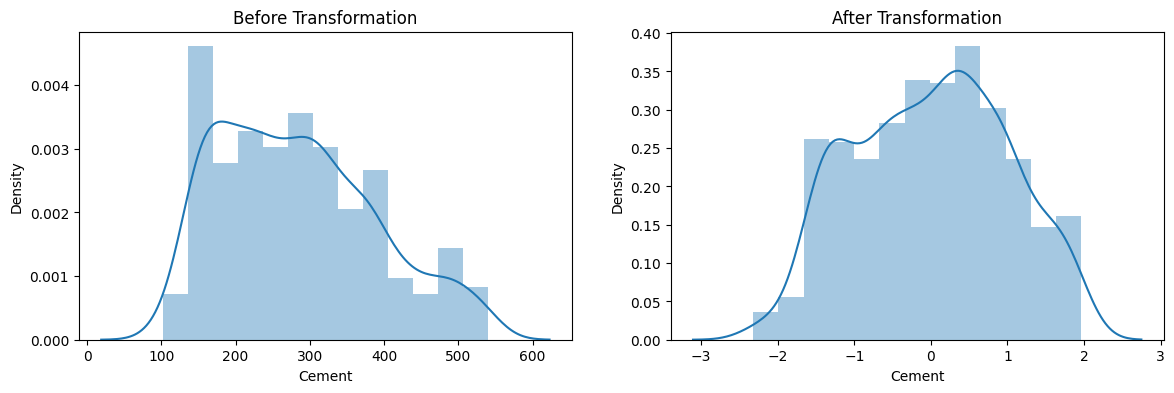

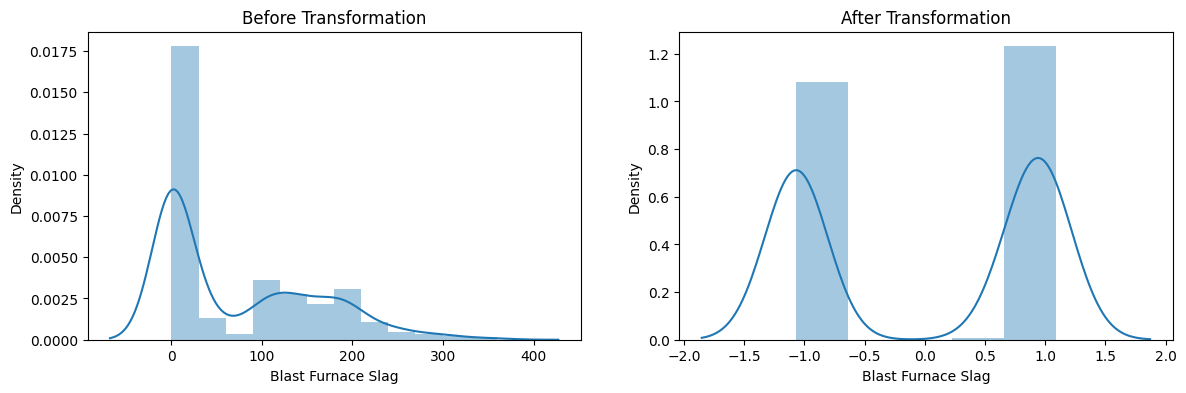

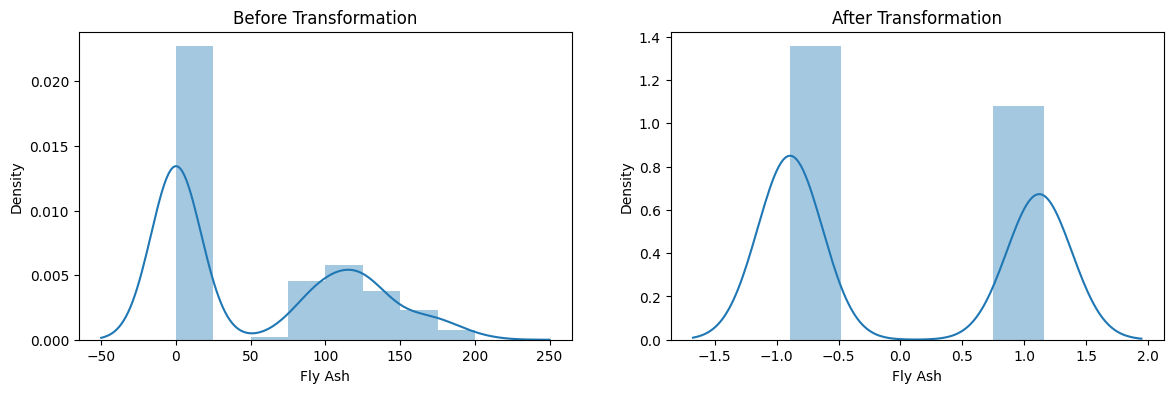

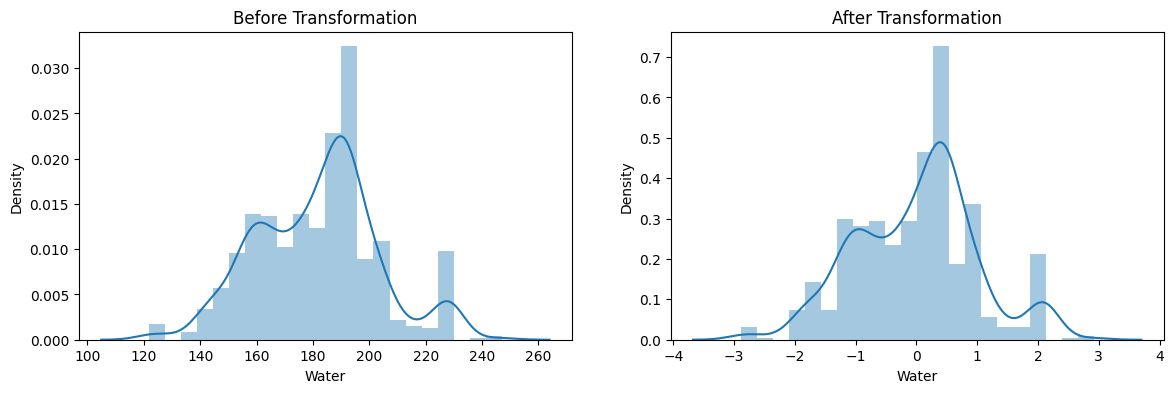

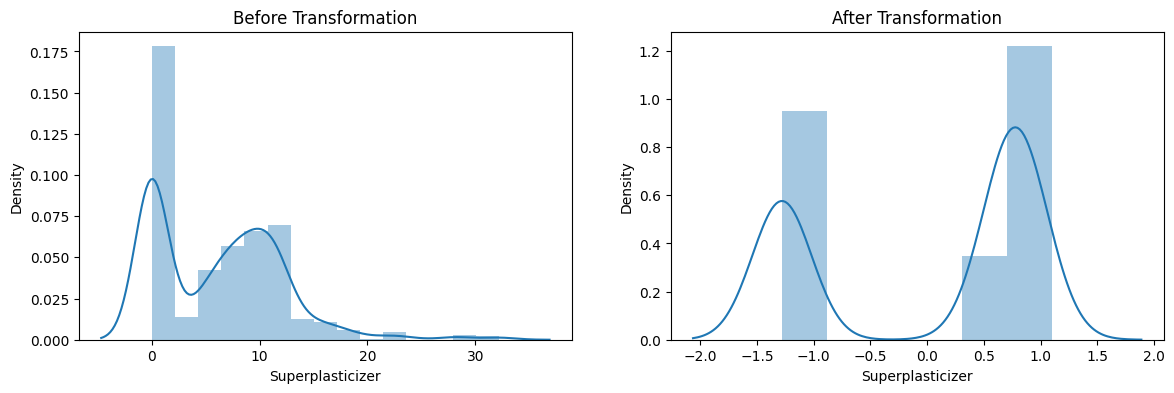

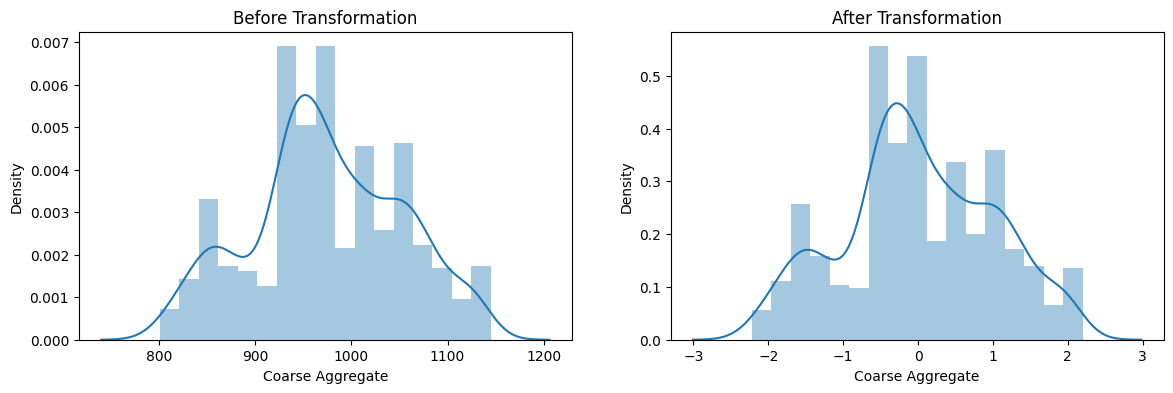

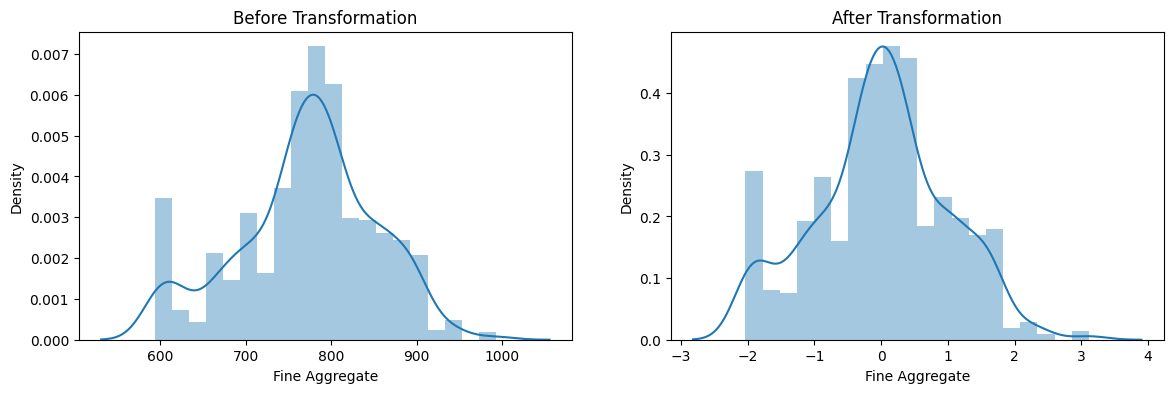

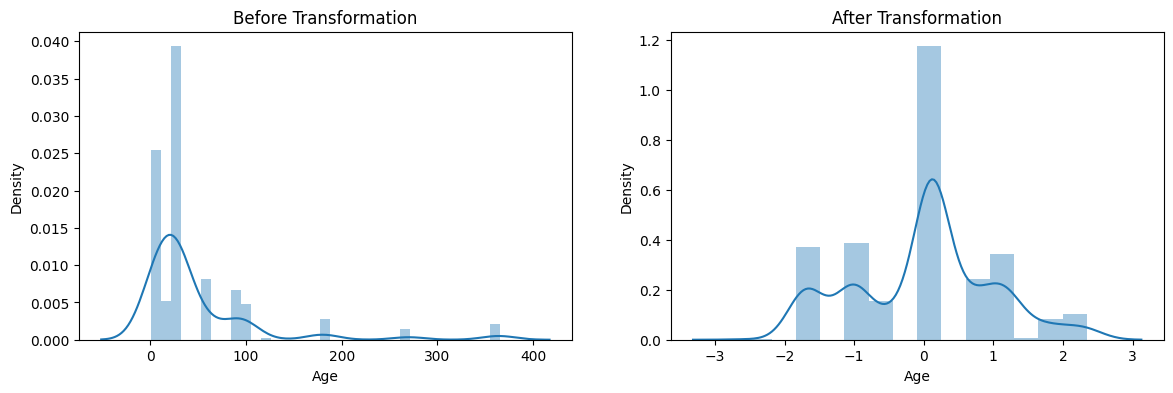

In [21]:
import warnings
warnings.filterwarnings('ignore')

for col in X_train_transform.columns:
    
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title('Before Transformation')
    plt.subplot(122)
    sns.distplot(X_train_transform[col])
    plt.title('After Transformation')
    
    plt.show()

In [24]:
# Applying Yeo-Johnson transform

pt = PowerTransformer(standardize=True)
X_train_transform = pt.fit_transform(X_train)
X_test_transform = pt.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transform , y_train)
y_pred = lr.predict(X_test_transform)
print(r2_score(y_test , y_pred))
pd.DataFrame({'cols': X_train.columns ,'yeo-johnson-lambdas': pt.lambdas_})

0.7774915803540878


,cols,yeo-johnson-lambdas
0,Cement,0.177898
1,Blast Furnace Slag,-0.000895
2,Fly Ash,-0.153526
3,Water,0.745286
4,Superplasticizer,0.248529
5,Coarse Aggregate,1.012583
6,Fine Aggregate,1.993569
7,Age,-0.019067
